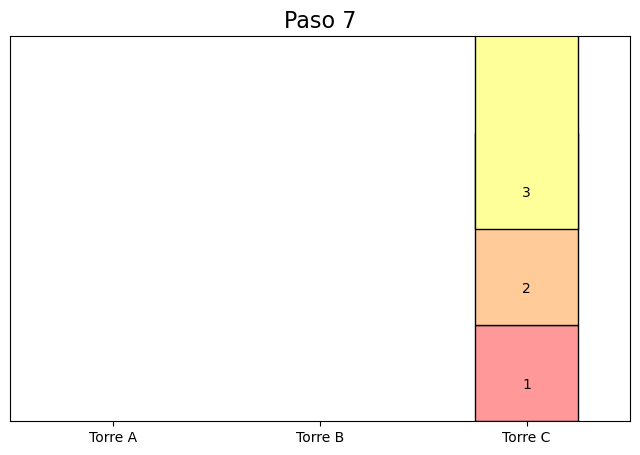

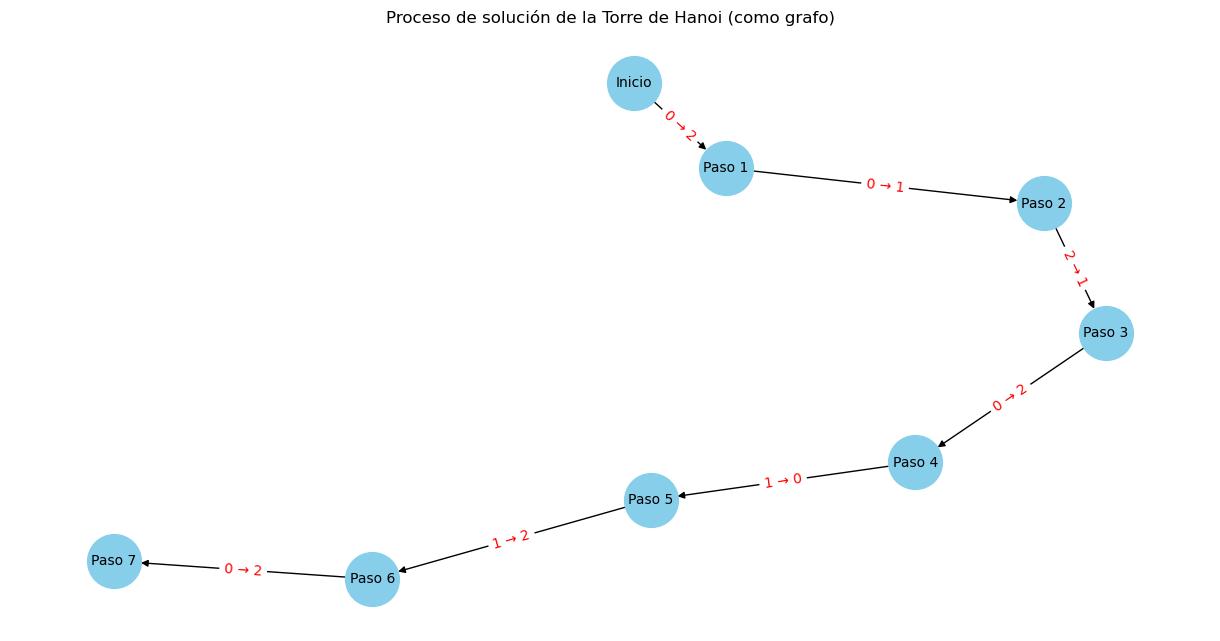

In [1]:
import heapq
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import networkx as nx

# Clase para representar el estado del problema
class EstadoHanoi:
    def __init__(self, torres, movimientos=None):
        self.torres = torres
        self.movimientos = movimientos or []

    def es_objetivo(self, n_discos):
        return self.torres == [[], [], list(range(n_discos, 0, -1))]

    def generar_sucesores(self):
        sucesores = []
        for origen in range(3):
            if not self.torres[origen]:
                continue
            disco = self.torres[origen][-1]
            for destino in range(3):
                if origen == destino:
                    continue
                if not self.torres[destino] or self.torres[destino][-1] > disco:
                    nueva_torres = [list(t) for t in self.torres]
                    nueva_torres[origen].pop()
                    nueva_torres[destino].append(disco)
                    sucesores.append(EstadoHanoi(nueva_torres, self.movimientos + [(origen, destino)]))
        return sucesores

    def __hash__(self):
        return hash(tuple(tuple(t) for t in self.torres))

    def __eq__(self, other):
        return self.torres == other.torres

# Heurística: número de discos fuera de la torre destino
def heuristica(estado, n_discos):
    return sum(disco != estado.torres[2][-(i+1)] if i < len(estado.torres[2]) else 1 for i, disco in enumerate(reversed(range(1, n_discos+1))))

# A* para resolver la torre de Hanoi
def a_estrella_hanoi(n_discos):
    from itertools import count
    estado_inicial = EstadoHanoi([list(range(n_discos, 0, -1)), [], []])
    visitados = set()
    contador = count()

    frontera = [(heuristica(estado_inicial, n_discos), 0, next(contador), estado_inicial)]

    while frontera:
        _, costo, _, actual = heapq.heappop(frontera)

        if actual in visitados:
            continue
        visitados.add(actual)

        if actual.es_objetivo(n_discos):
            return actual.movimientos

        for sucesor in actual.generar_sucesores():
            if sucesor not in visitados:
                nuevo_costo = costo + 1
                heur = heuristica(sucesor, n_discos)
                heapq.heappush(frontera, (nuevo_costo + heur, nuevo_costo, next(contador), sucesor))
    return []

# 🚀 Ejecuta el modelo para 3 discos


# Visualización de movimientos
def graficar_estado(pilas, paso, delay=1):
    clear_output(wait=True)
    colores = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FFCC']
    n = sum(len(v) for v in pilas)
    plt.figure(figsize=(8, 5))
    for torre in range(3):
        discos = pilas[torre]
        for nivel, disco in enumerate(reversed(discos)):
            plt.bar(torre, disco, bottom=nivel, color=colores[disco-1], width=0.5, edgecolor='black')
            plt.text(torre, nivel + 0.3, str(disco), ha='center', va='bottom', fontsize=10)
    plt.title(f"Paso {paso}", fontsize=16)
    plt.xticks([0, 1, 2], ['Torre A', 'Torre B', 'Torre C'])
    plt.yticks([])
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, n + 1)
    plt.grid(False)
    plt.show()
    time.sleep(delay)

# Ejecutar búsqueda A* y visualizarla
def ejecutar_hanoi_a_estrella(n_discos):
    movimientos = a_estrella_hanoi(n_discos)
    print(f"Total de movimientos: {len(movimientos)}")

    torres = [list(range(n_discos, 0, -1)), [], []]
    graficar_estado(torres, 0)
    for paso, (origen, destino) in enumerate(movimientos, 1):
        disco = torres[origen].pop()
        torres[destino].append(disco)
        graficar_estado(torres, paso)

    # 📈 Al final, dibujar el proceso completo como grafo
    dibujar_grafo_solucion(movimientos)



def dibujar_grafo_solucion(movimientos):
    G = nx.DiGraph()

    # Estado inicial
    G.add_node(0, label='Inicio')

    # Crear nodos para cada movimiento
    for i in range(1, len(movimientos) + 1):
        G.add_node(i, label=f"Paso {i}")

    # Conectar nodos
    for i in range(len(movimientos)):
        G.add_edge(i, i+1, movimiento=f"{movimientos[i][0]} → {movimientos[i][1]}")

    # Obtener etiquetas para los nodos
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'movimiento')

    # Dibujar el grafo
    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)  # Para posición bonita

    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1500, node_color='skyblue', font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Proceso de solución de la Torre de Hanoi (como grafo)")
    plt.axis('off')
    plt.show()



ejecutar_hanoi_a_estrella(3)